In [10]:
import pandas as pd

dataset = "ecdc_cases.csv"
display_first = pd.read_csv(dataset)

print(display_first.head())

     date_rep  day  month  year  cases  deaths countries_and_territories  \
0  2020-12-14   14     12  2020  746.0       6               Afghanistan   
1  2020-12-13   13     12  2020  298.0       9               Afghanistan   
2  2020-12-12   12     12  2020  113.0      11               Afghanistan   
3  2020-12-11   11     12  2020   63.0      10               Afghanistan   
4  2020-12-10   10     12  2020  202.0      16               Afghanistan   

  geo_id country_territory_code  pop_data_2018 continent_exp  \
0     AF                    AFG            NaN          Asia   
1     AF                    AFG            NaN          Asia   
2     AF                    AFG            NaN          Asia   
3     AF                    AFG            NaN          Asia   
4     AF                    AFG            NaN          Asia   

             load_date iso_country     daterep  
0  2025-03-28 00:04:30          AF  2020-12-14  
1  2025-03-28 00:04:30          AF  2020-12-13  
2  2025-03-

In [11]:
std_cases = display_first['cases'].std()
std_deaths = display_first['deaths'].std()

print(f"Standard Deviation of Cases {std_cases}")
print(f"Standard Deviation of Deaths {std_deaths}")

Standard Deviation of Cases 2597.918883980125
Standard Deviation of Deaths 131.22705508460183


In [12]:
display_first['date_rep'] = pd.to_datetime(display_first['date_rep'])

display_first = display_first.sort_values(by=['countries_and_territories', 'date_rep'])

print(display_first.isnull().sum())

date_rep                         0
day                              0
month                            0
year                             0
cases                          454
deaths                           0
countries_and_territories        0
geo_id                         275
country_territory_code         123
pop_data_2018                61900
continent_exp                    0
load_date                        0
iso_country                    275
daterep                          0
dtype: int64


In [13]:
# If there are missing cases or no mentions of deaths we can put them down as 0
display_first[['cases', 'deaths']] = display_first[['cases', 'deaths']].fillna(0)

In [14]:
country_stats = display_first.groupby("countries_and_territories")[['cases', 'deaths']].sum()

country_stats['mortality_rate'] = (country_stats['deaths'] / country_stats['cases'])


In [15]:
country_stats = display_first.groupby("countries_and_territories")[['cases', 'deaths']].sum()

country_stats['mortality_rate'] = (country_stats['deaths'] / country_stats['cases']) * 100
country_stats = country_stats.sort_values(by="mortality_rate", ascending=False)
print(country_stats.head(10))


                               cases  deaths  mortality_rate
countries_and_territories                                   
Yemen                         2083.0     606       29.092655
United_States_of_America   2126878.0  299177       14.066486
India                      1266602.0  143355       11.318078
Mexico                     1250044.0  113953        9.115919
Montserrat                      13.0       1        7.692308
Ecuador                     202110.0   13875        6.865073
Isle_of_Man                    370.0      25        6.756757
Brazil                     2694729.0  181402        6.731734
Sudan                        21386.0    1347        6.298513
Bolivia                     147150.0    9018        6.128440


In [16]:
import math
import numpy as np

std_cases = country_stats['cases'].std()
std_deaths = country_stats['deaths'].std()
var_cases = std_cases ** 2
var_deaths = std_deaths ** 2

print(f"Standard Deviation of Cases: {math.ceil(std_cases)}")
print(f"Standard Deviation of Deaths: {math.ceil(std_deaths)}")

Standard Deviation of Cases: 435085
Standard Deviation of Deaths: 28410


In [17]:
display_first['case_growth_rate'] = display_first.groupby('countries_and_territories')['cases'].pct_change() * 100
display_first['case_growth_rate'] = display_first['case_growth_rate'].fillna(0)
display_first[display_first['countries_and_territories'] == "United_States_of_America"].head(10)

,date_rep,day,month,year,cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2018,continent_exp,load_date,iso_country,daterep,case_growth_rate
59350,2019-12-31,31,12,2019,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2019-12-31,0.0
59349,2020-01-01,1,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-01,0.0
59348,2020-01-02,2,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-02,0.0
59347,2020-01-03,3,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-03,0.0
59346,2020-01-04,4,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-04,0.0
59345,2020-01-05,5,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-05,0.0
59344,2020-01-06,6,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-06,0.0
59343,2020-01-07,7,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-07,0.0
59342,2020-01-08,8,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-08,0.0
59341,2020-01-09,9,1,2020,0.0,0,United_States_of_America,US,USA,NaN,America,2025-03-28 00:04:30,US,2020-01-09,0.0


In [19]:
country_stats.to_csv("ecdc_cases_with_mortality.csv", index=False)

print(" 'mortality_rate' column added and saved to new csv!")

 'mortality_rate' column added and saved to new csv!


C:\Users\adamt\AppData\Local\Temp\ipykernel_25712\3563927811.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries["mortality_rate"], palette="Reds")


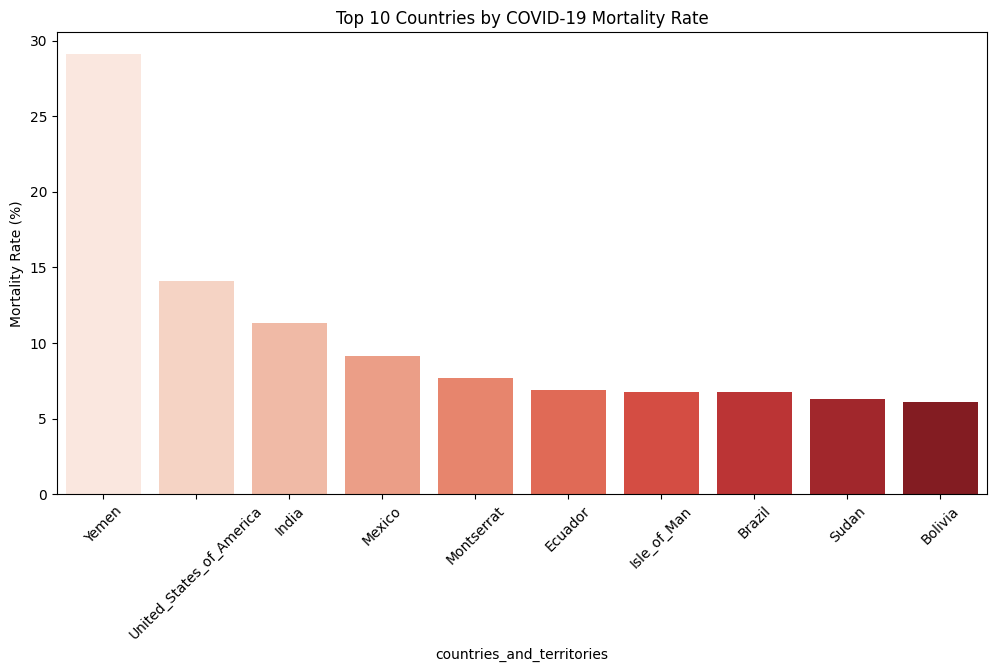

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# top 10 countries with highest mortality rates
top_countries = country_stats.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries["mortality_rate"], palette="Reds")
plt.xticks(rotation=45)
plt.ylabel("Mortality Rate (%)")
plt.title("Top 10 Countries by COVID-19 Mortality Rate")
plt.show()